# **INSTALLING NECESSARY PACKAGES**

In [ ]:
!pip install pandas numpy matplotlib seaborn nltk gensim pyLDAvis wordcloud spacy networkx textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 25.8 MB/s e

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# **IMPORTING LIBRARIES**

In [ ]:
## Cell 1: Imports and NLTK Data Downloads
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import textstat
nltk.download('punkt')
nltk.download('punkt_tab')

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from collections import Counter
from wordcloud import WordCloud
from gensim import corpora, models
from gensim.models import LdaModel
import spacy
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# **LOAD THE DATA FILE**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/open_ave_data.csv')

In [ ]:
# Quick schema & null‐counts
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    954 non-null    int64 
 1   ReportText    954 non-null    object
 2   findings      954 non-null    object
 3   clinicaldata  950 non-null    object
 4   ExamName      954 non-null    object
 5   impression    954 non-null    object
dtypes: int64(1), object(5)
memory usage: 44.8+ KB
None
Unnamed: 0      0
ReportText      0
findings        0
clinicaldata    4
ExamName        0
impression      0
dtype: int64


# **CLEANING THE DATA**

In [ ]:
# drop any row missing all textual fields
text_cols = df.select_dtypes(include='object').columns.tolist()
df.dropna(subset=text_cols, how='all', inplace=True)
df = df[text_cols]
print(f"Remaining records: {len(df)}")

Remaining records: 954


In [ ]:
##Clean Text (Lowercase, Remove Punctuation & Digits)
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords

# 2. (Optional) Drop stray index column if present
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# 3. Define a cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ""
    # lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)
    # collapse whitespace
    text = re.sub(r"\s+", " ", text).strip()
    # tokenize & remove stopwords
    tokens = text.split()
    tokens = [tok for tok in tokens if tok not in stopwords]
    return " ".join(tokens)

# 4. Apply to your text column (here assumed to be 'findings')
df["clean_findings"] = df["findings"].apply(clean_text)

# 5. Save cleaned data
clean_csv_path = "cleaned_open_ave_data.csv"
df.to_csv(clean_csv_path, index=False)
print(f"Cleaned data saved to {clean_csv_path!r}")

# 6. Load the cleaned CSV for further EDA / prompt‐engineering
cleaned_df = pd.read_csv(clean_csv_path)

# 7. Display the first 5 rows of the cleaned data
print(cleaned_df.head())


Cleaned data saved to 'cleaned_open_ave_data.csv'
                                          ReportText  \
0  EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...   
1  EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...   
2  EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...   
3  Exam: - CHEST-PORTABLE History: Chest pain Com...   
4  EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...   

                                            findings  \
0  FINDINGS: Lungs/Pleura: No focal opacities evi...   
1  FINDINGS: Lungs/Pleura: No focal opacities evi...   
2  FINDINGS: Lungs/Pleura: No focal opacities evi...   
3  Findings: Heart size appears normal. Lungs cle...   
4  FINDINGS: Lungs/Pleura: No focal opacities evi...   

                                        clinicaldata  \
0                      CLINICAL HISTORY: Cough. \n\n   
1                 CLINICAL HISTORY: CHEST PAIN. \n\n   
2                 CLINICAL HISTORY: CHEST PAIN. \n\n   
3                           History: Chest pain \n\n

In [ ]:
## Build Document–Term Matrix (Bag-of-Words)
vect = CountVectorizer(stop_words='english',
                       min_df=5,
                       max_df=0.5)
dtm = vect.fit_transform(df['full_text'])
# after fitting vect and dtm:
terms = vect.get_feature_names_out()
print(f"DTM shape: {dtm.shape}  (docs × terms)")
dtm_df = pd.DataFrame(dtm.toarray(), columns=terms)

# show first 10 documents × first 50 terms
from IPython.display import display
display(dtm_df.iloc[:10, :50])

DTM shape: (954, 363)  (docs × terms)


,abnormalities,abnormality,active,acute,additional,adenopathy,adequately,aerated,aeration,age,...,borderline,breath,breathing,bypersonalname,cabg,calcification,cardiac,cardiomediastinal,cardiomegaly,cardiopulmonary
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,2,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
6,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


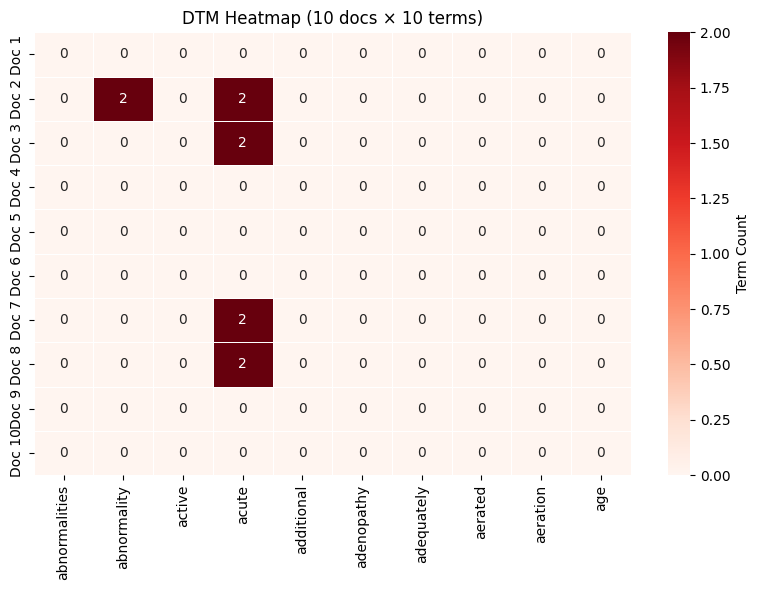

In [ ]:

import seaborn as sns

# 1. Reuse your dtm and terms from before
#    dtm: sparse matrix, terms: array of vocabulary

# 2. Convert a small slice to dense
dtm_slice = pd.DataFrame(
    dtm.toarray()[:10, :10],          # first 10 docs × first 10 terms
    columns=terms[:10],
    index=[f'Doc {i+1}' for i in range(10)]
)

# 3. Plot
plt.figure(figsize=(8,6))
sns.heatmap(
    dtm_slice,
    cmap='Reds',
    cbar_kws={'label':'Term Count'},
    linewidths=.5,
    annot=True,
    fmt='d'
)
plt.title('DTM Heatmap (10 docs × 10 terms)')
plt.ylabel('')
plt.tight_layout()
plt.show()


In [ ]:
## Cell 6: 5) Readability Metrics via textstat
# Flesch Reading Ease & Gunning Fog Index :contentReference[oaicite:14]{index=14}
df['flesch_reading_ease'] = df['full_text'].apply(textstat.flesch_reading_ease)
df['gunning_fog']          = df['full_text'].apply(textstat.gunning_fog)
print(df[['flesch_reading_ease','gunning_fog']].describe())

       flesch_reading_ease  gunning_fog
count           954.000000   954.000000
mean            -70.576170    51.314495
std              35.683584    13.699651
min            -268.383966    17.800000
25%             -81.798773    43.531707
50%             -61.567500    46.700000
75%             -54.283676    55.723016
max              28.007353   130.068966


In [ ]:
## Cell 7: 6) Estimated Reading Time
# textstat.reading_time returns seconds estimated to read the text :contentReference[oaicite:15]{index=15}
df['reading_time_sec'] = df['full_text'].apply(textstat.reading_time)
print(df['reading_time_sec'].describe())


count    954.000000
mean       9.108016
std        2.954635
min        2.996760
25%        7.668180
50%        8.167640
75%       10.018580
max       28.351700
Name: reading_time_sec, dtype: float64


# **EXPLORATORY DATA ANALYSIS**

***Document‐Level Statistics***

,word_count,char_count
count,954.000000,954.000000
mean,101.822851,720.837526
std,32.957428,233.294579
min,32.000000,235.000000
25%,82.000000,603.000000
50%,92.000000,646.000000
75%,114.000000,791.000000
max,290.000000,2191.000000


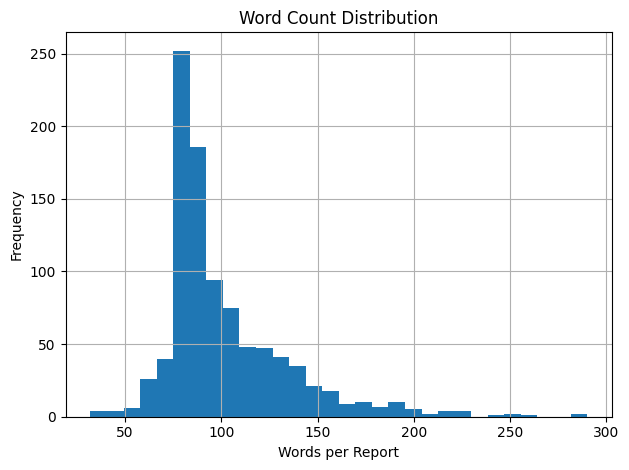

In [ ]:
# 1. Word & Character Counts
df['word_count'] = df['full_text'].str.split().apply(len)
df['char_count'] = df['full_text'].str.len()

display(df[['word_count','char_count']].describe())

# 2. Histogram of Word Counts
plt.figure()
df['word_count'].hist(bins=30)
plt.title('Word Count Distribution')
plt.xlabel('Words per Report')
plt.ylabel('Frequency')
plt.tight_layout()
# plt.show()


***Text Statistics***

,word,count
0,no,4952
1,chest,4751
2,exam,2956
3,normal,2506
4,the,2504
5,findings,2008
6,comparison,1895
7,impression,1885
8,view,1882
9,is,1838


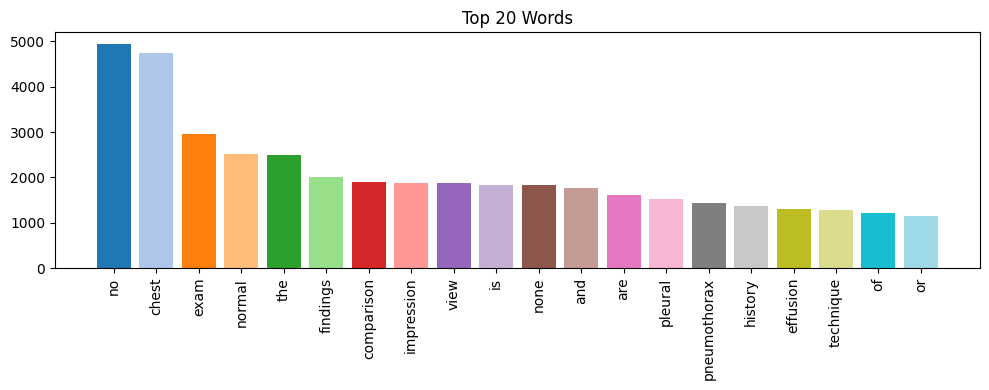

In [ ]:
# 4.1 Word Frequency Analysis
all_tokens = nltk.word_tokenize(' '.join(df['full_text']))
freq = Counter([t for t in all_tokens if t.isalpha()])
top20 = freq.most_common(20)
freq_df = pd.DataFrame(top20, columns=['word','count'])
display(freq_df)

colors = plt.cm.tab20(np.linspace(0, 1, len(freq_df)))
plt.figure(figsize=(10,4))
plt.bar(freq_df['word'], freq_df['count'], color = colors)
plt.xticks(rotation=90)
plt.title('Top 20 Words')
plt.tight_layout()
plt.show()



***Heatmap of Top-Term Co-occurrence***

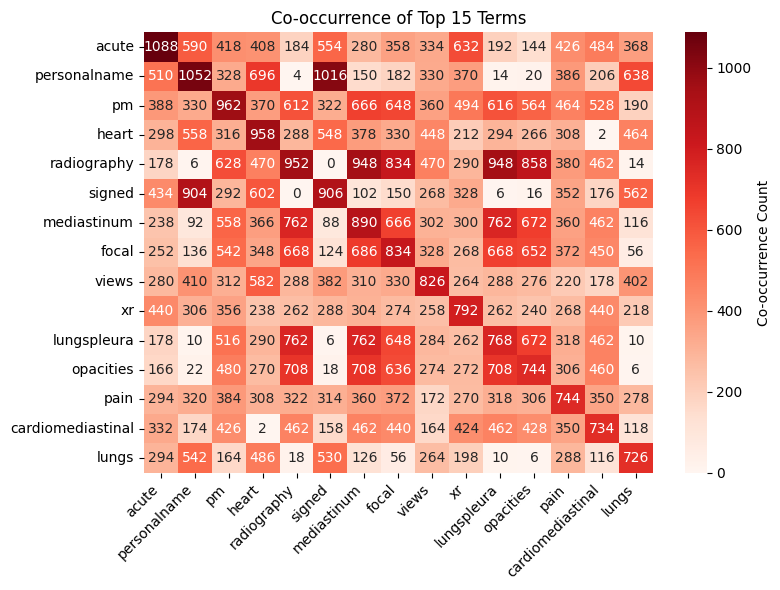

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# 1) Compute overall term frequencies (reuse your vect from before if you have it)
vect = CountVectorizer(stop_words='english', min_df=5, max_df=0.5)
dtm = vect.fit_transform(df['full_text'])
terms = vect.get_feature_names_out()

# 2) Pick the top 15 most frequent terms
counts = np.ravel(dtm.sum(axis=0))
freq_df = pd.DataFrame({'term': terms, 'count': counts})
top_terms = freq_df.nlargest(15, 'count')['term'].tolist()

# 3) Build a small DTM containing **only** those top terms
vect_top = CountVectorizer(vocabulary=top_terms)
dtm_top = vect_top.fit_transform(df['full_text']).toarray()

# 4) Compute co-occurrence matrix: term_i × term_j = #docs where both appear
cooc = np.dot(dtm_top.T, (dtm_top > 0).astype(int))

# 5) Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    cooc,
    xticklabels=top_terms,
    yticklabels=top_terms,
    cmap='Reds',
    annot=True,
    fmt='d',
    cbar_kws={'label': 'Co-occurrence Count'}
)
plt.title('Co-occurrence of Top 15 Terms')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


***Sentence Length Analysis***

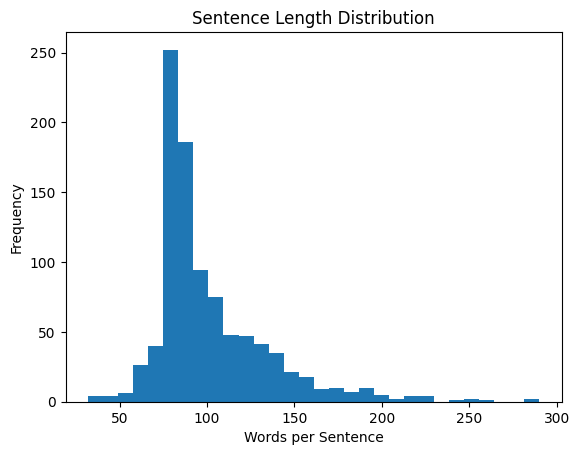

In [ ]:
sent_lens = [len(nltk.word_tokenize(sent))
             for doc in df['full_text']
             for sent in nltk.sent_tokenize(doc)]
plt.figure()
plt.hist(sent_lens, bins=30)
plt.title('Sentence Length Distribution')
plt.xlabel('Words per Sentence')
plt.ylabel('Frequency')
plt.show()



***Average Word Length per Document***

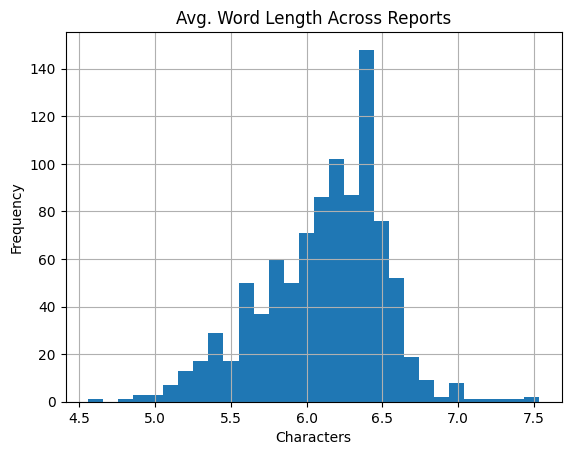

,avg_word_len
count,954.000000
mean,6.107369
std,0.400728
min,4.558824
25%,5.851533
50%,6.173913
75%,6.371927
max,7.534483


,avg_word_len
0,6.550000
1,6.115385
2,6.063830
3,6.294118
4,6.104167
5,6.088889
6,6.258065
7,5.793103
8,6.152174
9,5.731707


In [ ]:
df['avg_word_len'] = df['full_text'].apply(
    lambda doc: np.mean([len(w) for w in nltk.word_tokenize(doc) if w.isalpha()]))
plt.figure()
df['avg_word_len'].hist(bins=30)
plt.title('Avg. Word Length Across Reports')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()

display(df['avg_word_len'].describe().to_frame('avg_word_len'))
display(df[['avg_word_len']].head(10))

# **N-Gram Exploration**

***Bigram***

,bigram,count
0,pleural effusion,1206
1,exam chest,1090
2,chest radiography,952
3,effusion pneumothorax,846
4,clinical history,800
5,xr chest,788
6,exam date,776
7,signed personalname,774
8,radiography exam,766
9,findings lungspleura,752


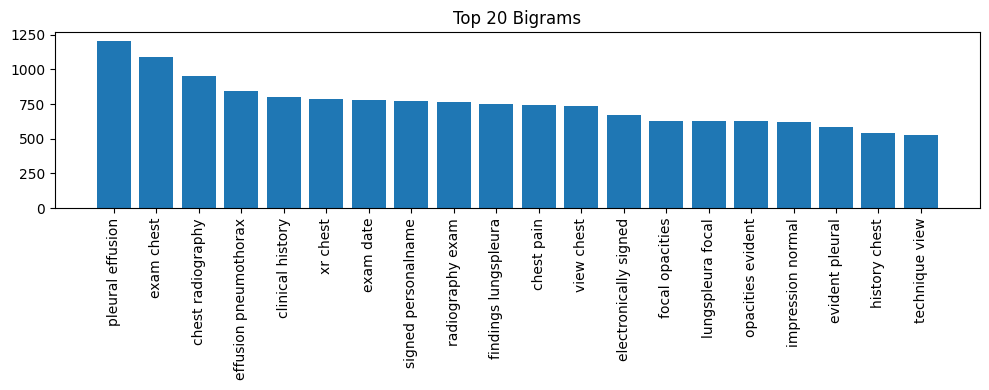

In [ ]:
bigram_vect = CountVectorizer(ngram_range=(2,2), stop_words='english', min_df=5)
X2 = bigram_vect.fit_transform(df['full_text'])
bigrams = Counter(dict(zip(bigram_vect.get_feature_names_out(), X2.sum(axis=0).A1)))
bigram_df = pd.DataFrame(bigrams.most_common(20), columns=['bigram','count'])
display(bigram_df)

plt.figure(figsize=(10,4))
plt.bar(bigram_df['bigram'], bigram_df['count'])
plt.xticks(rotation=90)
plt.title('Top 20 Bigrams')
plt.tight_layout()
plt.show()


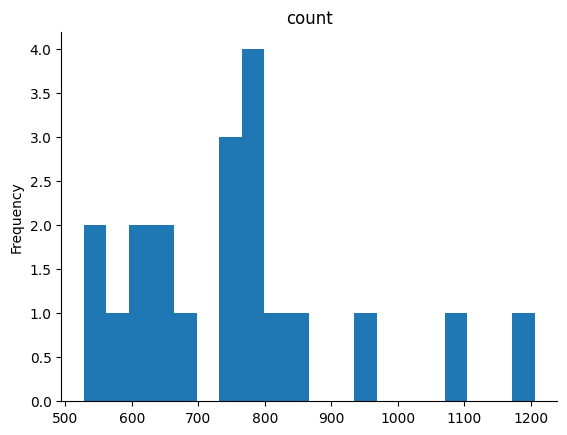

In [ ]:
#title count

from matplotlib import pyplot as plt
bigram_df['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

***Trigram***

,trigram,count
0,pleural effusion pneumothorax,814
1,chest radiography exam,766
2,exam chest radiography,766
3,radiography exam date,766
4,findings lungspleura focal,628
5,focal opacities evident,628
6,lungspleura focal opacities,624
7,evident pleural effusion,588
8,opacities evident pleural,586
9,electronically signed personalname,564


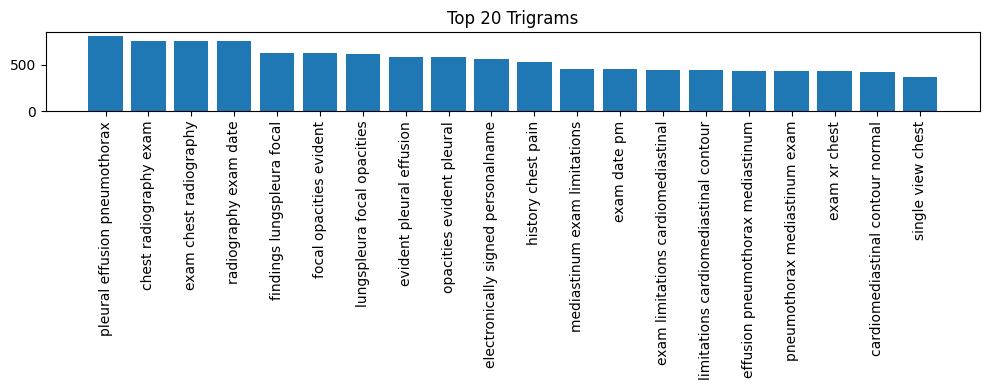

In [ ]:
from collections import Counter   # ensure Counter is imported

# Trigram
trigram_vect = CountVectorizer(ngram_range=(3,3), stop_words='english', min_df=5)
X3 = trigram_vect.fit_transform(df['full_text'])
trigrams = Counter(dict(zip(trigram_vect.get_feature_names_out(), X3.sum(axis=0).A1)))
trigram_df = pd.DataFrame(trigrams.most_common(20), columns=['trigram','count'])
display(trigram_df)

plt.figure(figsize=(10,4))
plt.bar(trigram_df['trigram'], trigram_df['count'])
plt.xticks(rotation=90)
plt.title('Top 20 Trigrams')
plt.tight_layout()
plt.show()


***WordCloud***

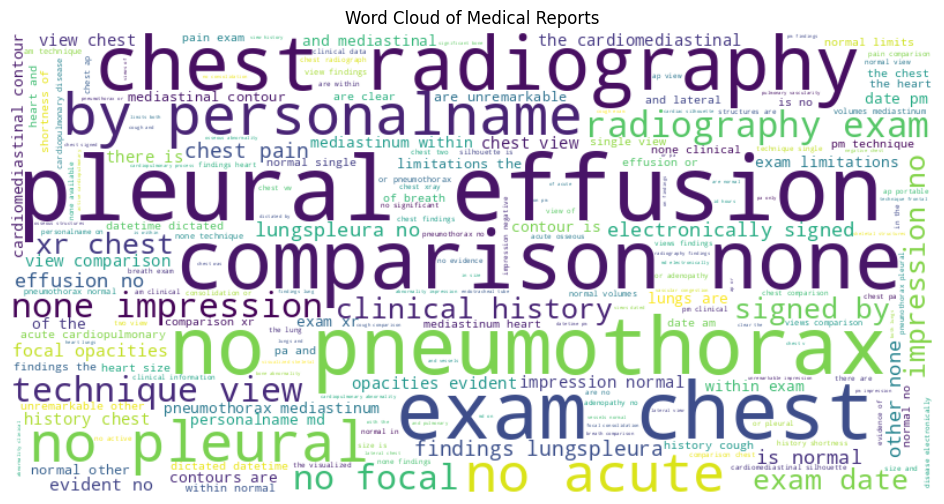

In [ ]:
all_text = ' '.join(df['full_text'])
wc = WordCloud(width=800, height=400, background_color='white',
               stopwords='english', max_words=200).generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Medical Reports')
plt.show()


***Topic Modeling & pyLDAvis***

In [ ]:

nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])
def preprocess(doc):
    sp = nlp(doc)
    return [tok.lemma_ for tok in sp if tok.is_alpha and not tok.is_stop]

texts = [preprocess(doc) for doc in df['full_text']]
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(txt) for txt in texts]

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=5, passes=10, random_state=42)
vis = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)


***New Visualization: Pareto Chart to Compute term frequencies***

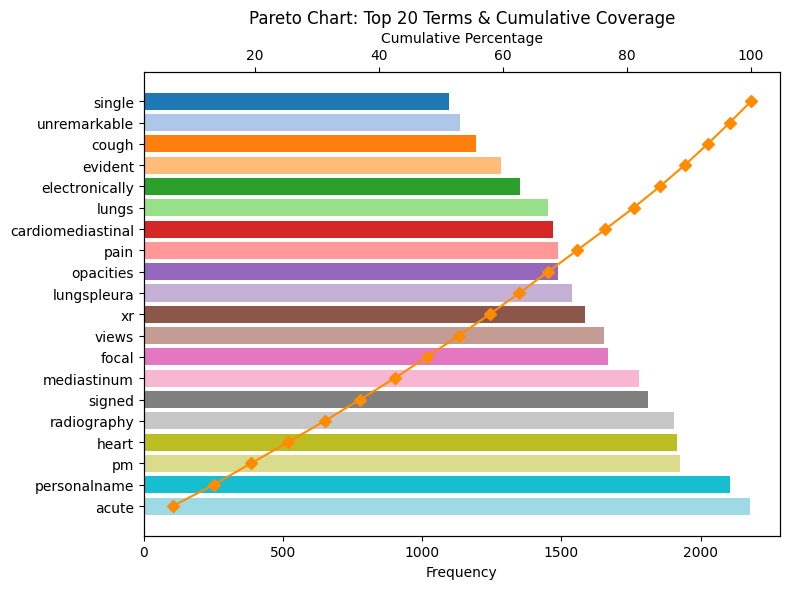

In [ ]:
vect = CountVectorizer(stop_words='english', min_df=5, max_df=0.5)
dtm = vect.fit_transform(df['full_text'])
terms = vect.get_feature_names_out()
counts = np.ravel(dtm.sum(axis=0))
freq_df = pd.DataFrame({'term': terms, 'count': counts})
freq_df = freq_df.sort_values('count', ascending=False).head(20)
freq_df['cum_pct'] = 100 * freq_df['count'].cumsum() / freq_df['count'].sum()

colors = plt.cm.tab20(np.linspace(0, 1, len(freq_df)))
# 3. Pareto Bar Chart
fig, ax = plt.subplots(figsize=(8,6))
# horizontal bars
ax.barh(freq_df['term'][::-1], freq_df['count'][::-1], color= colors)
ax.set_xlabel('Frequency')
ax.set_title('Pareto Chart: Top 20 Terms & Cumulative Coverage')
ax.invert_yaxis()

# cumulative line on twin x-axis
ax2 = ax.twiny()
ax2.plot(freq_df['cum_pct'][::-1], freq_df['term'][::-1], color='darkorange', marker='D')
ax2.set_xlabel('Cumulative Percentage')

plt.tight_layout()
plt.show()
